In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import seaborn as sns

In [2]:
df = pd.read_csv('orders.csv')

In [3]:
df.head()

,order_id,cus_id,status,sex,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,1,1,Returned,Male,2019-06-04 10:10:00 UTC,2019-06-08 20:53:00 UTC,2019-06-05 17:14:00 UTC,2019-06-08 15:55:00 UTC,2
1,2,2,Processing,Female,2022-05-23 14:42:00 UTC,NaN,NaN,NaN,1
2,3,3,Complete,Male,2020-06-20 15:09:00 UTC,NaN,2020-06-21 12:14:00 UTC,2020-06-24 17:28:00 UTC,3
3,4,3,Complete,Male,2021-08-23 15:09:00 UTC,NaN,2021-08-26 07:58:00 UTC,2021-08-26 14:46:00 UTC,3
4,5,3,Shipped,Male,2021-07-01 15:09:00 UTC,NaN,2021-07-03 11:21:00 UTC,NaN,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124923 entries, 0 to 124922
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      124923 non-null  int64 
 1   cus_id        124923 non-null  int64 
 2   status        124923 non-null  object
 3   sex           124923 non-null  object
 4   created_at    124923 non-null  object
 5   returned_at   12570 non-null   object
 6   shipped_at    81252 non-null   object
 7   delivered_at  43598 non-null   object
 8   num_of_item   124923 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 8.6+ MB


In [7]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['shipped_at'] = pd.to_datetime(df['shipped_at'])
df['delivered_at'] = pd.to_datetime(df['delivered_at'])

In [8]:
# Tạo thêm một cột thời gian từ lúc đặt đến lúc giao hàng
df['delivery_time'] = df['delivered_at'] - df['created_at']

In [18]:
df['delivery_time'].value_counts()

4.0    8866
3.0    8795
2.0    7159
5.0    7140
1.0    4426
6.0    4353
0.0    1464
7.0    1395
Name: delivery_time, dtype: int64

<AxesSubplot: xlabel='delivery_time', ylabel='Count'>

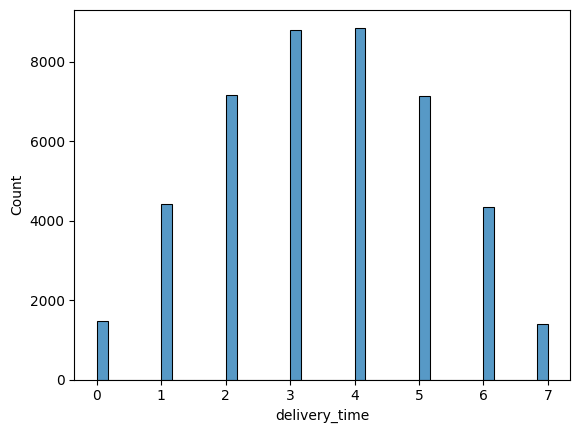

In [20]:
sns.histplot(df['delivery_time'])

In [22]:
# xác định các đơn đầu tiên và cuối cùng của mỗi khách hàng
df['first_order'] = df.groupby('cus_id')['created_at'].transform('min')
df['last_order'] = df.groupby('cus_id')['created_at'].transform('max')

df.head()

,order_id,cus_id,status,sex,created_at,returned_at,shipped_at,delivered_at,num_of_item,delivery_time,first_order,last_order
0,1,1,Returned,Male,2019-06-04 10:10:00+00:00,2019-06-08 20:53:00 UTC,2019-06-05 17:14:00+00:00,2019-06-08 15:55:00+00:00,2,4.0,2019-06-04 10:10:00+00:00,2019-06-04 10:10:00+00:00
1,2,2,Processing,Female,2022-05-23 14:42:00+00:00,NaN,NaT,NaT,1,NaN,2022-05-23 14:42:00+00:00,2022-05-23 14:42:00+00:00
2,3,3,Complete,Male,2020-06-20 15:09:00+00:00,NaN,2020-06-21 12:14:00+00:00,2020-06-24 17:28:00+00:00,3,4.0,2020-06-20 15:09:00+00:00,2021-08-23 15:09:00+00:00
3,4,3,Complete,Male,2021-08-23 15:09:00+00:00,NaN,2021-08-26 07:58:00+00:00,2021-08-26 14:46:00+00:00,3,2.0,2020-06-20 15:09:00+00:00,2021-08-23 15:09:00+00:00
4,5,3,Shipped,Male,2021-07-01 15:09:00+00:00,NaN,2021-07-03 11:21:00+00:00,NaT,1,NaN,2020-06-20 15:09:00+00:00,2021-08-23 15:09:00+00:00


In [24]:
# tạo một bảng bao gồm những đơn hàng cuối cùng
df_last_order = df[df['created_at'] == df['last_order']]
df_last_order = df_last_order[df_last_order['status']=='Complete']
df_last_order.head()

,order_id,cus_id,status,sex,created_at,returned_at,shipped_at,delivered_at,num_of_item,delivery_time,first_order,last_order
3,4,3,Complete,Male,2021-08-23 15:09:00+00:00,NaN,2021-08-26 07:58:00+00:00,2021-08-26 14:46:00+00:00,3,2.0,2020-06-20 15:09:00+00:00,2021-08-23 15:09:00+00:00
31,32,25,Complete,Male,2022-05-07 05:39:00+00:00,NaN,2022-05-07 21:41:00+00:00,2022-05-09 18:36:00+00:00,2,2.0,2022-05-07 05:39:00+00:00,2022-05-07 05:39:00+00:00
43,44,35,Complete,Female,2021-07-02 16:43:00+00:00,NaN,2021-07-04 14:57:00+00:00,2021-07-07 03:35:00+00:00,1,4.0,2021-07-02 16:43:00+00:00,2021-07-02 16:43:00+00:00
44,45,36,Complete,Male,2021-03-05 11:01:00+00:00,NaN,2021-03-05 12:59:00+00:00,2021-03-07 11:48:00+00:00,3,2.0,2021-03-05 11:01:00+00:00,2021-03-05 11:01:00+00:00
46,47,38,Complete,Female,2021-01-04 03:30:00+00:00,NaN,2021-01-06 05:28:00+00:00,2021-01-10 23:03:00+00:00,1,6.0,2021-01-04 03:30:00+00:00,2021-01-04 03:30:00+00:00


<AxesSubplot: xlabel='delivery_time', ylabel='Count'>

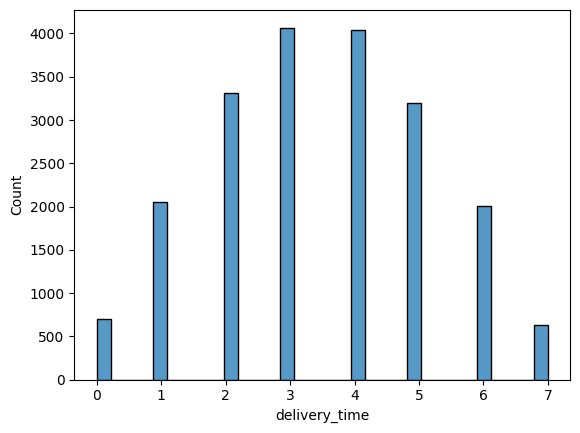

In [27]:
sns.histplot(df_last_order['delivery_time'])

In [28]:
df_detail = pd.read_csv('order_details.csv')
df_items = pd.read_csv('items.csv')

In [29]:
df_detail = df_detail.merge(df_items, left_on='item_id', right_on='id', how='left')

In [30]:
df_detail

,id_x,order_id,item_id,inventory_id,sale_price,id_y,cost,category,brand,retail_price,department,fulfillment_id
0,15721,10826,13606,42278,2.50,13606,1.60750,Accessories,Scarf_tradinginc,2.50,Women,3
1,19167,13243,13606,51560,2.50,13606,1.60750,Accessories,Scarf_tradinginc,2.50,Women,3
2,77007,53140,13606,207367,2.50,13606,1.60750,Accessories,Scarf_tradinginc,2.50,Women,3
3,151639,104681,13606,408715,2.50,13606,1.60750,Accessories,Scarf_tradinginc,2.50,Women,3
4,170817,117931,13606,460556,2.50,13606,1.60750,Accessories,Scarf_tradinginc,2.50,Women,3
...,...,...,...,...,...,...,...,...,...,...,...,...
180947,126133,87039,3449,339845,9.82,3449,4.57972,Dresses,Allegra K,9.82,Women,9
180948,29532,20413,3449,79513,9.82,3449,4.57972,Dresses,Allegra K,9.82,Women,9
180949,90377,62343,3449,243461,9.82,3449,4.57972,Dresses,Allegra K,9.82,Women,9
180950,121073,83537,3449,326127,9.82,3449,4.57972,Dresses,Allegra K,9.82,Women,9
